Loading weights  logs/ear20210330T1552/mask_rcnn_ear_0028.h5
Re-starting from epoch 28
(960, 544, 3)
Processing 1 images
image                    shape: (960, 544, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1920, 1088, 3)    min:  -48.22000  max:  215.44000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 521730, 4)        min:   -0.08327  max:    1.02439  float32


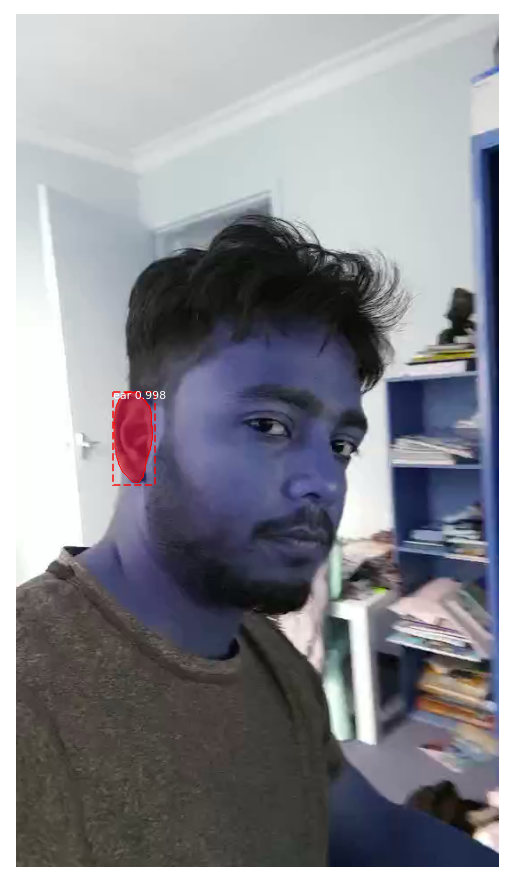

Inference time: 0.34s


error: OpenCV(4.4.0) /tmp/pip-build-b3fha69c/opencv-python/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
sys.path.append('/home/mdmursalin/earMaskRCNN/src/Mask_RCNN/')
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import cv2

import Ear

%matplotlib inline 
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Dataset directory
DATASET_DIR = "/home/mdmursalin/dataforearmaskrcnn"

# Inference Configuration
config = Ear.EarInferenceConfig()
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
class_names = ['BG', 'ear']
# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax
# # Load validation dataset
# dataset = Ear.EarDataset()
# dataset.load_ear(DATASET_DIR, "test")
# dataset.prepare()

# print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
LOGS_DIR = "logs"
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)
# Path to a specific weights file
weights_path = "logs/ear20210330T1552/mask_rcnn_ear_0028.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)


capture = cv2.VideoCapture(os.path.join(DATASET_DIR, 'video.mp4'))    
while True:
    ret, frame = capture.read()
    # Bail out when the video file ends
    if not ret:
        break        
    # Save each frame of the video to a list
    #frame_count += 1
    #frame.append(frame)
    #if len(frames) == batch_size:
    print(frame.shape)
    results = model.detect([frame], verbose=1)
    r = results[0]

    boxes = r['rois']
    masks = r['masks']
    class_ids = r['class_ids']
    scores = r['scores']

    # Run detection
    start = time.time()
    masked_image = visualize.display_instances(frame, boxes, masks, class_ids, class_names, scores)
    end = time.time()
    print("Inference time: {:.2f}s".format(end - start))

    # Display the resulting frame
    cv2.imshow('', masked_image)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break







sys.exit()
